## Simple Demonstration of Smartypy Utilities
(in work)

### Neural Networks

In [1]:
%matplotlib inline
from smartypy import neuralNetwork
import numpy as np
import pylab as plt

//anaconda/envs/python35/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/zachdischner/code/machineLearningCoursera/smartypy/logisticRegression.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  display_array[rowStart:rowStart+example_height, colStart:colStart+example_width] = X[curr_ex,:].reshape((example_height,example_width)).T/max_val


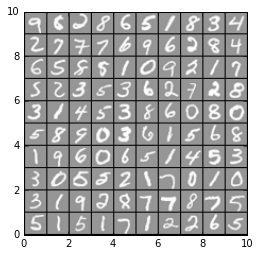

In [2]:
## Load Test Data
X,y,theta1,theta2 = neuralNetwork._load_test_data()
m,n = X.shape

num_classifications = len(np.unique(y))
# y_classifications = zeros((m,num_classifications))
# for idx in range(m):
#     y_classifications[idx,y[idx]] = 1

## Test data X is a set of images (reshaped from 20x20 ==> 400x1) with handwritten digits 
# Display some images
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100],:]
plt.figure()
neuralNetwork.displayData(sel) ## Produces some warnings, its okay. Took this funciton from course materials

In [3]:
## Form a simple 2-layer SupervisedNeuralNetwork Object
snn = neuralNetwork.SupervisedNeuralNetwork(X,y, 
                                            num_classifications=num_classifications, 
                                            regularization=1.0)
# Note, object determines input and output layer size automagically
print(snn)
snn.train(max_iter=10)
print("Trained Neural Network with final cost calculated as J = {}".format(snn.J))

Neural Network with 2 Layers, mapping 400 inputs to 10 outputs. Current approx cost 7.35444018977336
Training neural network described layer nodes=None. Regularization=1.0
Performing minimization (this could take a while). Initial cost: 7.309114576907212
Iter: 0, cost: 3.50015
Iter: 1, cost: 2.03055
Iter: 2, cost: 1.81052
Iter: 3, cost: 1.45486
Iter: 4, cost: 1.03893
Iter: 5, cost: 0.78318
Iter: 6, cost: 0.65947
Iter: 7, cost: 0.61038
Iter: 8, cost: 0.60212
Iter: 9, cost: 0.58894
         Current function value: 0.588945
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 156
         Hessian evaluations: 0
Minimization completed with final cost 0.588944704412424
Trained Neural Network with final cost calculated as J = 10.890156417556518


2-layer Neural Network predicted that the image represents digit 8 with 88.0672061431385% confidence. Truth ==> 8
2-layer Neural Network predicted that the image represents digit 0 with 55.811181882549945% confidence. Truth ==> 0
2-layer Neural Network predicted that the image represents digit 6 with 91.02634111497765% confidence. Truth ==> 6
2-layer Neural Network predicted that the image represents digit 0 with 99.9975662332406% confidence. Truth ==> 0
2-layer Neural Network predicted that the image represents digit 5 with 46.464112912165646% confidence. Truth ==> 5


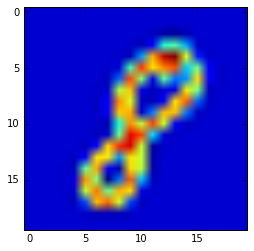

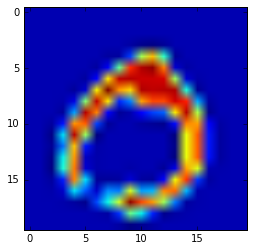

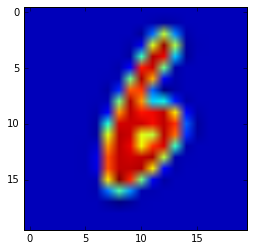

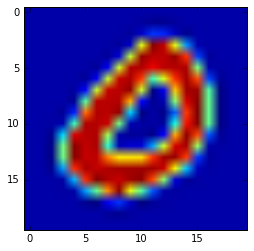

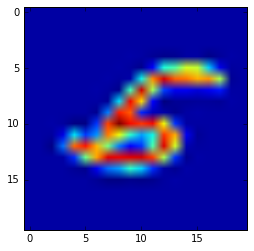

In [5]:
## See how it did
for ii in range(4):
    imagenum = np.random.randint(5000)
    plt.figure()
    plt.imshow(np.reshape(X[imagenum],(20,20)).T)
    nn_guess,confidence = snn.predict(X[imagenum])[0]
    print("2-layer Neural Network predicted that the image represents digit {} with {}% confidence. Truth ==> {}".format(nn_guess,100*confidence,y[imagenum]))

### How about more layers???

Neural Network with 3 Layers, mapping 400 inputs to 10 outputs. Current approx cost 7.161835075622193
Training neural network described layer nodes=None. Regularization=1.0
Performing minimization (this could take a while). Initial cost: 7.156367386543503
Iter: 0, cost: 3.46897
Iter: 1, cost: 3.24555
Iter: 2, cost: 3.09081
Iter: 3, cost: 2.81238
Iter: 4, cost: 2.32674
Iter: 5, cost: 1.69822
Iter: 6, cost: 1.52889
Iter: 7, cost: 1.21793
Iter: 8, cost: 0.83602
Iter: 9, cost: 0.77634
Iter: 10, cost: 0.72058
Iter: 11, cost: 0.62640
Iter: 12, cost: 0.57148
Iter: 13, cost: 0.49102
Iter: 14, cost: 0.45499
         Current function value: 0.454986
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 231
         Hessian evaluations: 0
Minimization completed with final cost 0.4549863502604197
Trained Neural Network with final cost calculated as J = 8.702910905411304
3-layer Neural Network predicted that the image represents digit 4 with 96.39459611169693% con

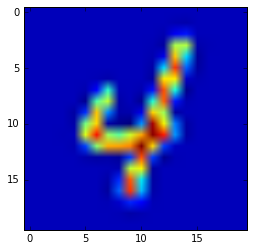

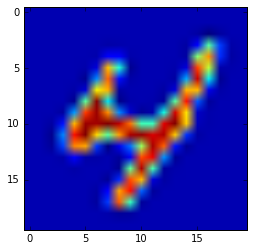

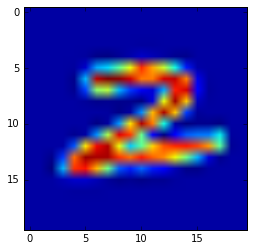

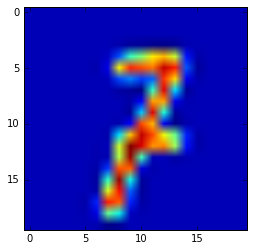

In [6]:
## That kinda sucked at predicting. Let's try again with an additional layer in the network
snn.add_layer(25) # Easy to add another layer

# could have also passed >> hidden_layer_sizes=[25] on instantiation
print(snn)
## Retrain
snn.train(max_iter=15) ## More layers, might take more forward/back propegations
print("Trained Neural Network with final cost calculated as J = {}".format(snn.J))

## See how it did
for ii in range(4):
    imagenum = np.random.randint(5000)
    plt.figure()
    plt.imshow(np.reshape(X[imagenum],(20,20)).T)
    nn_guess,confidence = snn.predict(X[imagenum])[0]
    print("3-layer Neural Network predicted that the image represents digit {} with {}% confidence. Truth ==> {}".format(nn_guess,100*confidence,y[imagenum]))

2

Neural Network with 2 Layers, mapping 400 inputs to 10 outputs